# el viejo confiable
el veijo confiable es el geyser mas famoso y visitado del mudo. Esto se debe a que sus erupciones son extremadamente regulares, lo que permite que los turistas puedan tener la experiencia de verlo garantizada.

En este ejemplo vamso a ver coo se ven los clusters del viejo confiable



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# carga de datos
url = "https://dmontero.org/mineria/datasets/old_faithful.csv"
df = pd.read_csv(url)

df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Text(0.5, 1.0, 'Datos sin agrupar')

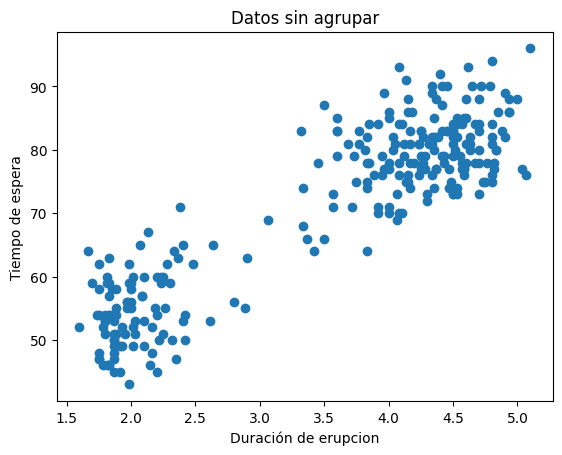

In [6]:
# graficamos los datos
plt.scatter(df['eruptions'], df['waiting'])
plt.xlabel('Duración de erupcion')
plt.ylabel('Tiempo de espera')
plt.title('Datos sin agrupar')

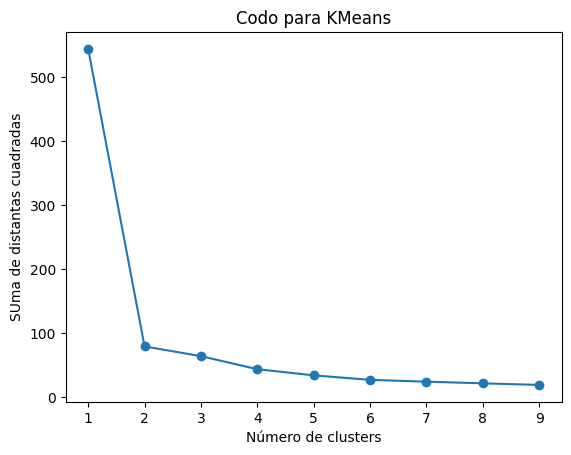

In [7]:
# Se aplica tecnica del codo para ver cuantos clusters hay

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# escalamos los datos
X_esc = StandardScaler().fit_transform(df)

# Se crea un arreglo para ir guardando las sumas de distancias que luego se usaran para visualizar el codo
# sum of squared euclidean distances
sse = []
rango = range(1, 10)

for k in rango:
    km = KMeans(n_clusters=k , n_init="auto")
    km.fit(X_esc)
    sse.append(km.inertia_)

# graficamos el codo
plt.plot(rango, sse, "-o")
plt.xlabel('Número de clusters')
plt.ylabel('SUma de distantas cuadradas')
plt.title('Codo para KMeans')
plt.show()

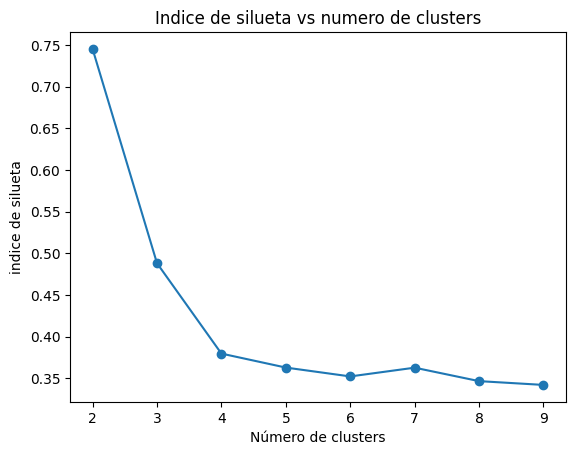

In [10]:
# Calculo de indice de silueta
# Este indice no se puede calcular para k = 1, pues toma la distancia entre 2 clusters.

# Se crea un arreglo para el promedio del indice de silueta
from sklearn.metrics import silhouette_samples
promedio_silueta = []
rango = range(2, 10)
for k in rango:
    km = KMeans(n_clusters=k , n_init="auto")
    labels = km.fit_predict(X_esc)
    vals_silueta = silhouette_samples(X_esc, labels)
    promedio_silueta.append(np.mean(vals_silueta))

# graficamos el promedio del indice de silueta
plt.plot(rango, promedio_silueta, "-o")
plt.xlabel('Número de clusters')
plt.ylabel('indice de silueta')
plt.title('Indice de silueta vs numero de clusters')
plt.show()

Text(0.5, 1.0, 'Datos escalados y agrupados con k = 2')

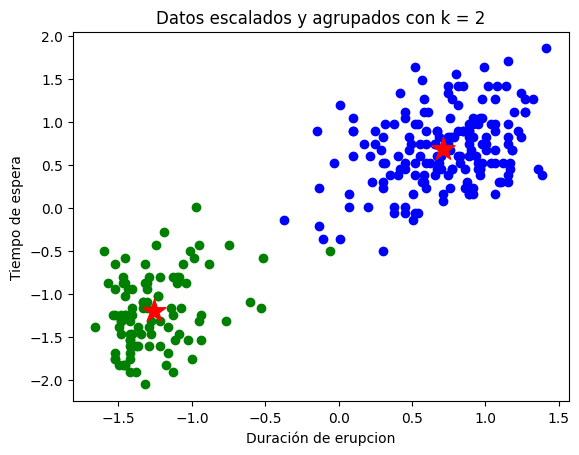

In [19]:
# grafiquemos para k = 2
k = 2
km = KMeans(n_clusters=k , n_init="auto")
labels = km.fit_predict(X_esc)
val = list(set(labels))
colores = ['blue','green','black','yellow','brown']
for i in val:
    plt.scatter(
        X_esc[labels == i, 0],
        X_esc[labels == i, 1],
        color = colores[i],
        label = f'Cluster: {i}'
    )

# Fuera del ciclo
centroides = km.cluster_centers_
plt.scatter(
    centroides[:, 0],
    centroides[:, 1],
    color='red',
    marker='*',
    label='Centroides',
    s=300
)
plt.xlabel('Duración de erupcion')
plt.ylabel('Tiempo de espera')
plt.title('Datos escalados y agrupados con k = 2')